In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [55]:
responses = pd.read_csv('heightWeightGender.csv').dropna()

responses.head(10)

,Height,Weight,Gender
0,162.0,55.0,female
1,148.0,57.0,female
2,152.0,47.0,female
3,153.0,62.0,female
4,153.0,44.0,female
5,153.0,42.0,female
6,154.0,67.0,female
7,154.0,60.0,female
8,154.0,58.0,female
9,155.0,50.0,female


In [56]:
responses.dtypes

Height    float64
Weight    float64
Gender     object
dtype: object

In [57]:
dummies = pd.get_dummies(responses['Gender'])

In [58]:
dummies.head()

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [59]:
responses.isnull().sum().sort_values(ascending=False).head()

Gender    0
Weight    0
Height    0
dtype: int64

In [60]:
responses['female'] = dummies['female']

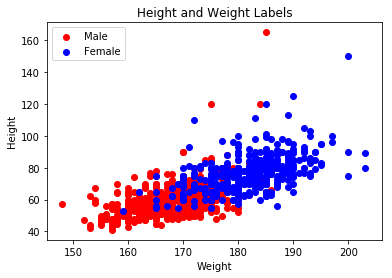

In [61]:
plt.scatter(
    responses[responses['female'] == 1].Height,
    responses[responses['female'] == 1].Weight,
    color='red'
)
plt.scatter(
    responses[responses['female'] == 0].Height,
    responses[responses['female'] == 0].Weight,
    color='blue'
)
plt.legend(['Male', 'Female'])
plt.title('Height and Weight Labels')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [62]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = responses[['Height', 'Weight']]
Y = responses.female
neighbors.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [65]:
neighbors = KNeighborsClassifier(n_neighbors=20)
X = responses[['Height', 'Weight']]
Y = responses.female
neighbors.fit(X,Y)

## Predict for an 82 Height, 167 Weight person.
print(neighbors.predict([[82, 167]]))
print(neighbors.predict_proba([[82, 167]]))

[0]
[[0.6 0.4]]


In [66]:
#So we are predicting that this is a male with 20 neighbor. But it was predicted female with 5